# Advanced Python: PCA, UMAP and clustering

<center>
<img src="../pictures/seurat_seascape.jpg" style="width:465px;height:375px;">
<br>
<i>Seascape at Port-en-Bessin, Normandy (1888, Georges Seurat)</i>
</center>

In the previuos session, we have seen PCA as a dimensionality reduction technique. Today, we will review PCA and introduce UMAP, another (more complex) dimensionality reduction method.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# load dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits_data = digits.data
digits_target = digits.target

# standardize (demean + scale) the data
scaler = StandardScaler()
digits_data_scaled = scaler.fit_transform(digits_data)

# apply PCA
pca = PCA()
digits_data_pca = pca.fit_transform(digits_data_scaled)

Generally, there are a few things we care about after we perform PCA:
1. How many PCs do we need to explain a certain amount of *variance*?
2. Is there something interesting about the *PC*s?
   - Are the PCs correlated with some of the original features?
3. What are the *loadings*? i.e. What do our data look like in the PC space?

### Exercises:
1. Visualize the digits dataset in terms of the first 2 PCs. 
    > Plot each samples loading/projection onto the first 2 PCs.
    1. What do you see?
    2. Are there any clusters?
2. What do the first 2 PCs look like?

Text(0.5, 1.0, 'PCA of Digits Dataset')

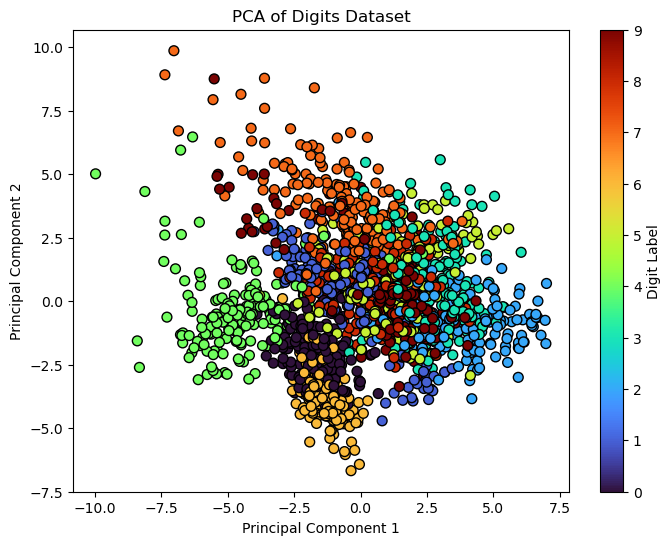

In [6]:
pc_i, pc_j = 0, 1 # choose PCs to plot

plt.figure(figsize=(8, 6))
plt.scatter(digits_data_pca[:, pc_i], digits_data_pca[:, pc_j],
            c=digits_target, cmap="turbo", edgecolor='k', s=50)

plt.colorbar(label='Digit Label')
plt.xlabel(f'Principal Component {pc_i + 1}')
plt.ylabel(f'Principal Component {pc_j + 1}')
plt.title('PCA of Digits Dataset')

Text(0.5, 1.0, 'Principal Component 2')

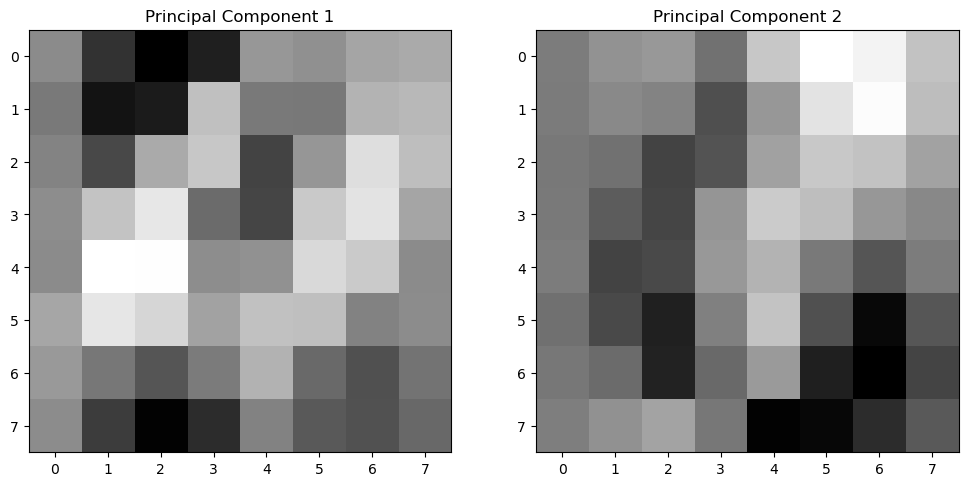

In [9]:
# first 2 pcs
plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pca.components_[pc_i].reshape(8, 8), cmap='gray')
plt.title(f'Principal Component {pc_i + 1}')

plt.subplot(1, 2, 2)
plt.imshow(pca.components_[pc_j].reshape(8, 8), cmap='gray')
plt.title(f'Principal Component {pc_j + 1}')

### Enter UMAP (Uniform Manifold Approximation and Projection)

In [10]:
import umap

In [27]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
digits_umap = reducer.fit_transform(digits_data_scaled)

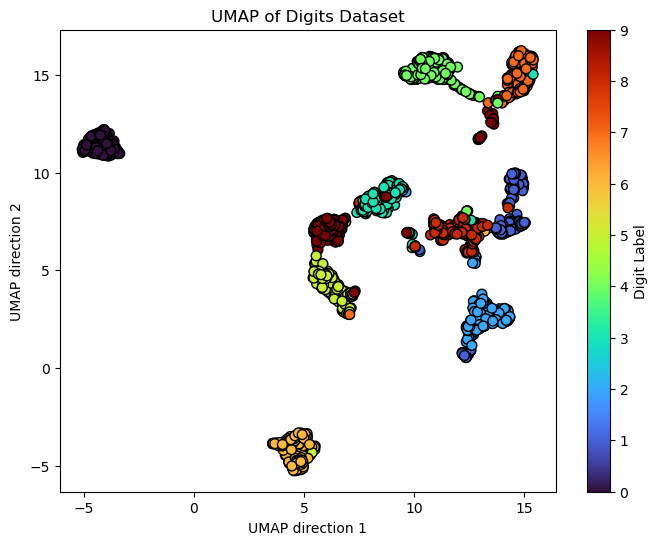

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(digits_umap[:, 0], digits_umap[:, 1],
            c=digits_target, cmap="turbo", edgecolor='k', s=50)

plt.xlabel('UMAP direction 1')
plt.ylabel('UMAP direction 2')
plt.title('UMAP of Digits Dataset') 

plt.colorbar(label='Digit Label')
plt.show()

### Clustering
Here, we introduce K-means clustering as an example of clustering algorithm.

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

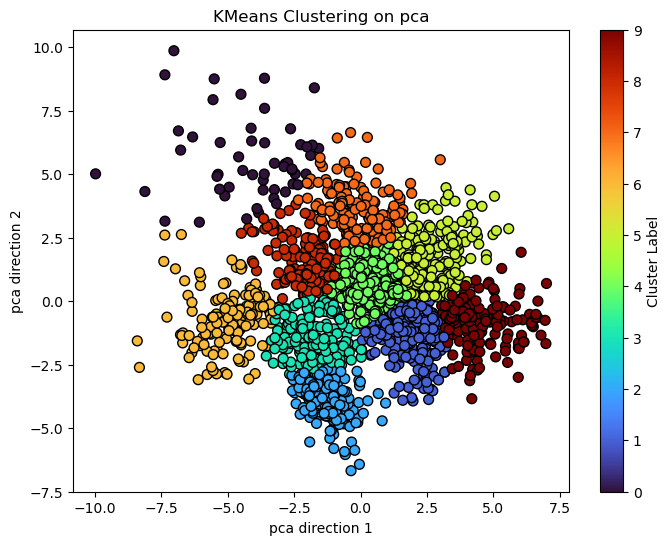

Adjusted Rand Index for pca: 0.3248


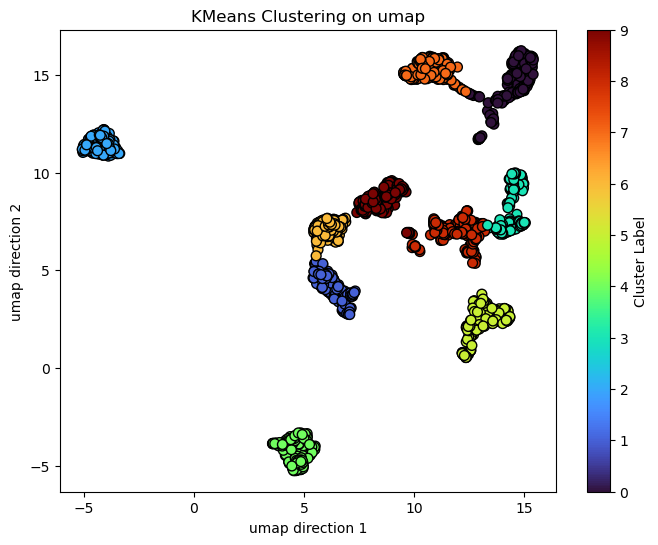

Adjusted Rand Index for umap: 0.8676


In [32]:
digits_pca = digits_data_pca[:, :2]  # use first 2 PCs
data = {"pca": digits_pca, "umap": digits_umap}

for key, X in data.items():
    kmean = KMeans(n_clusters=10, random_state=42)
    kmean.fit(X)

    labels = kmean.labels_
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="turbo", edgecolor='k', s=50)
    plt.title(f'KMeans Clustering on {key}')
    plt.xlabel(f'{key} direction 1')
    plt.ylabel(f'{key} direction 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

    ari = adjusted_rand_score(digits_target, labels)
    print(f'Adjusted Rand Index for {key}: {ari:.4f}')